In [1]:
import numpy as np
import pandas as pd

## Apple vs Pears

### Pandas

Это удобная библиотека для работы с данными в виде csv, tsv, ... файлов. Данные такого вида часто встречаются в задачах машинного обучения.

In [3]:
data = pd.read_csv("apple_pears.csv")
data.head() #data.head(n)

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


Посмотрим на распределения признаков:

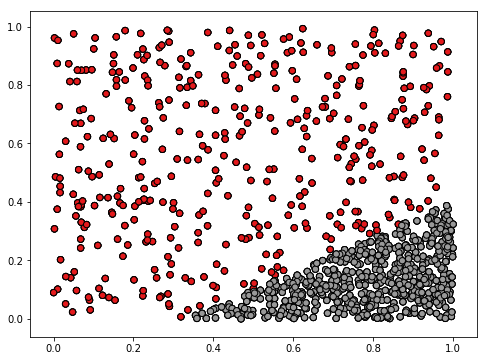

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(8, 6))
plt.scatter(data[['yellowness']], data[['symmetry']], c=data[['target']],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.show()

### Train-test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
target = np.array(data[['target']])
features = np.array(data[['yellowness', 'symmetry']])

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.15, random_state=35)

print(X_train.shape)
print(X_test.shape)
print(type(X_train))

(850, 2)
(150, 2)
<class 'numpy.ndarray'>


### KNN

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
knn.predict(X_test)

array([ 0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(knn.predict(X_test), Y_test)

0.97999999999999998

In [55]:
import sklearn.metrics
#dir(sklearn.metrics)

In [56]:
#'accuracy_score''auc''completeness_score''recall_score''roc_auc_score' precision_score
#'consensus_score''f1_score''fbeta_score''log_loss''mean_absolute_error''mean_squared_error''median_absolute_error'
#'mutual_info_score''r2_score''roc_curve'
sklearn.metrics.f1_score(knn.predict(X_test), Y_test)

0.9822485207100593

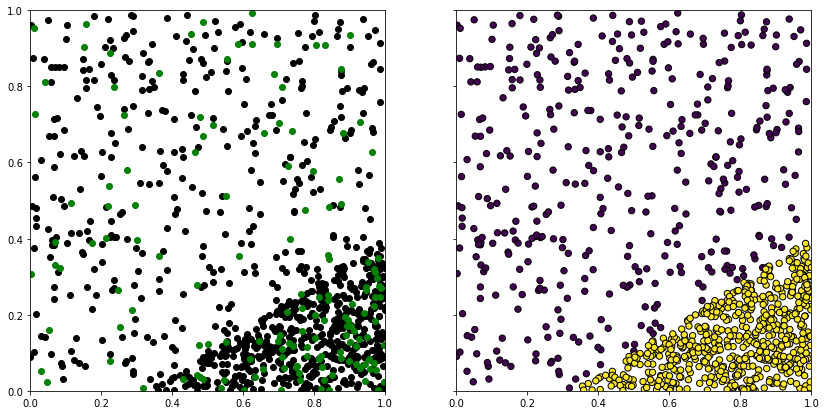

In [57]:
min_x, max_x = 0, 1 #0.65, 0.95
min_y, max_y = 0, 1 #0.2, 0.35

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,7))

ax1.scatter(X_train[:, 0], X_train[:, 1], color='k')
ax1.scatter(X_test[:, 0], X_test[:, 1], color='g')

ax1.set_ylim(min_y, max_y)
ax1.set_xlim(min_x, max_x)

ax2.scatter(data.values[:, 0], data.values[:, 1], c=data.values[:, 2], edgecolor='k', s=40)

ax2.set_ylim(min_y, max_y)
ax2.set_xlim(min_x, max_x)

plt.show()

In [58]:
results = []
for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, Y_train)
    results.append(accuracy_score(knn.predict(X_test), Y_test))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


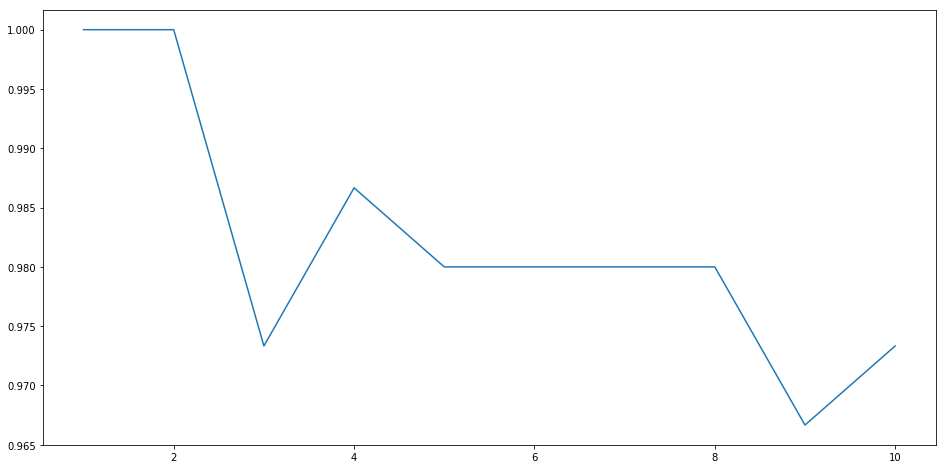

In [59]:
plt.figure(figsize=(16, 8))
plt.plot(list(range(1, 11)), results)
plt.show()

## House pricing

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [183]:
from sklearn import metrics, neighbors, dummy, preprocessing, svm

In [184]:
train_data = pd.read_csv("train_housing.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Feature Processing

In [185]:
from copy import deepcopy

def cat_to_numbers(data, columns):
    """
    turn categorical features into numerical
    
    data: pd.csv dataset
    columns: list of cstegorical columns to process
    """
    numerical_data = deepcopy(data)
    for column in columns:
        numerical_column = []
        numerical_dict = {}
        for item in data[column]:
            if item not in numerical_dict:
                numerical_dict[item] = len(numerical_dict)
            numerical_column.append(numerical_dict[item])
        numerical_data[column] = numerical_column
    return numerical_data

def binarize(data, columns):
    """
    binarize feature
    
    data: pd.csv dataset
    columns: list of cstegorical columns to process
    """
    binarized_data = deepcopy(data)
    for column in columns:
        unique_items = set(data[column])
        for unique_item in unique_items:
            new_column = []
            for item in data[column]:
                new_column.append(int(item==unique_item))
            binarized_data[column+'_'+unique_item] = new_column
        binarized_data.drop(column, axis=1, inplace=True)
    return binarized_data

In [186]:
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

#encoded_data, encoders = #тут ваш код
#encoded_data.head()

In [187]:
thres = 0.1

condition = train_data.isnull().sum()/max(train_data.count())
condtinion_apply = condition[np.array(condition > thres)]
names = list(condtinion_apply.index)
names.append('Id')
print(names)
train_data.drop(names, axis=1, inplace=True)

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id']


In [188]:
ind = [x for x in train_data.columns if train_data.dtypes[x]=='O']
ind

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [189]:
train_data = cat_to_numbers(train_data, ind)

In [190]:
train_data.columns
train_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,8450,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,9600,0,0,0,0,1,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,11250,0,1,0,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,9550,0,1,0,0,2,0,2,...,272,0,0,0,0,2,2006,0,1,140000
4,60,0,14260,0,1,0,0,1,0,3,...,0,0,0,0,0,12,2008,0,0,250000


In [191]:
train_data = train_data.dropna()

In [192]:
Y_train = train_data[['SalePrice']]
X_train = train_data.drop("SalePrice", axis=1)

### Linear Regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [194]:
lr = LinearRegression()
#http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cross_val_score(lr, X_train, Y_train, scoring='neg_mean_squared_error') 

array([ -9.09745283e+08,  -1.39864239e+09,  -1.77392988e+09])

Посмотрим, какие коэффициенты получились у линейной регрессии:

In [195]:
lr.fit(X_train, Y_train)
lr.coef_

array([[ -1.42139146e+02,  -2.56450935e+02,   3.67285539e-01,
         -4.08013548e+04,   1.02384723e+03,   2.76549325e+03,
         -5.61178983e+04,   1.51827058e+03,   6.73575606e+03,
         -3.09997515e+02,  -2.29185497e+03,  -1.02810761e+04,
         -2.76273741e+02,   1.88627627e+02,   1.52403081e+04,
          6.24659882e+03,   4.04539518e+02,   1.12937391e+02,
          7.49909876e+03,  -1.41656531e+04,  -1.08038504e+03,
          1.13802302e+03,   3.53192031e+03,   2.56485051e+01,
          1.47836718e+03,   1.03295626e+03,  -3.58775964e+03,
          6.42860670e+03,  -2.88298649e+03,   2.18672523e+03,
         -1.06629638e+03,   3.66432274e+00,  -1.12395994e+03,
          9.88712948e+00,  -3.50633238e+00,   1.00451199e+01,
          4.05090501e+03,  -2.11814486e+03,   2.28444583e+03,
          2.23077989e+03,   1.66092828e+01,   1.65476379e+01,
          3.66393075e+00,   3.68208514e+01,   7.81626995e+03,
          1.17699255e+03,   6.31774808e+03,  -1.10930170e+03,
        

Посмотрим также на корреляцию признаков:

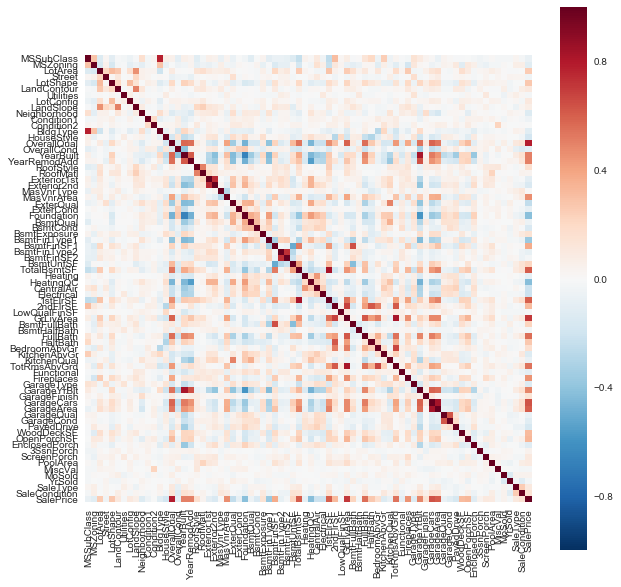

In [196]:
plt.subplots(figsize=(10,10))
#encoded_data, encoders = number_encode_features(train_data)
sns.heatmap(train_data.corr(), square=True)
plt.show()


In [199]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(train_data)
ss

StandardScaler(copy=True, with_mean=True, with_std=True)

Предсказание сердечно-сосудистых заболеваний

https://mlbootcamp.ru/round/12/sandbox/

In [211]:
train_data = pd.read_csv("train_med.csv", delimiter=';')
train_data.drop('id', axis=1, inplace=True)
train_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [228]:
X_train, Y_train = np.array(train_data.drop("cardio", axis=1)), np.array(train_data['cardio'])
print(Y_train)

[0 1 1 ..., 1 1 0]


In [213]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
cross_val_score(rf, X_train, Y_train, scoring='accuracy') 

array([ 0.7161224 ,  0.71496529,  0.71635522])

In [223]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

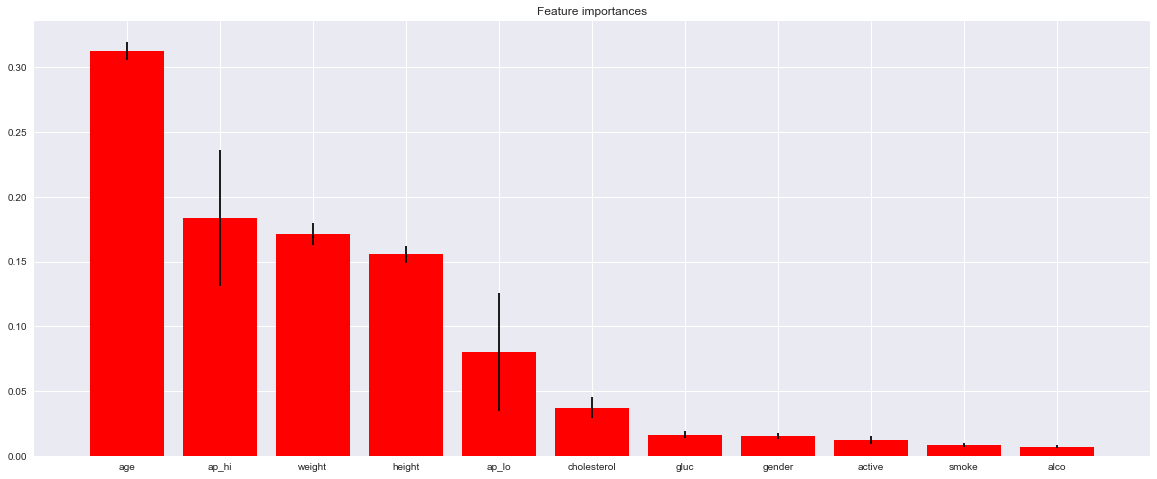

In [214]:
rf.fit(X_train, Y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), train_data.drop("cardio", axis=1).columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [244]:
importance_names = train_data.columns[indices]
drop_names = importance_names[5:]
drop_names
train_data.drop(drop_names, axis=1, inplace=True)

In [245]:
#'accuracy', 'average_precision', 'f1', 'precision', 'recall', 'roc_auc'

from sklearn.grid_search import GridSearchCV

rf = RandomForestClassifier()
params = {
    'n_estimators': [50, 100, 500]
}
gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='roc_auc', cv=3, verbose=2, n_jobs=3)
# splits data in 3 folds to validate
% time gsv.fit(X_train, Y_train)

# Tune n_estimators, 

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:   35.3s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:   35.3s finished


Wall time: 1min 8s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [246]:
print(gsv.best_params_, gsv.best_score_)

{'n_estimators': 500} 0.7773678152376395


In [247]:

from sklearn.grid_search import GridSearchCV

rf = RandomForestClassifier(n_estimators=500)
params = {
    'max_depth': [2, 5, 10, 50, 100]
}
gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='roc_auc', cv=3, verbose=2, n_jobs=3)
# splits data in 3 folds to validate
% time gsv.fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:  1.4min finished


Wall time: 1min 39s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'max_depth': [2, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [248]:
print(gsv.best_params_, gsv.best_score_)

{'max_depth': 10} 0.8021999869035293


In [249]:
rf = RandomForestClassifier(n_estimators=500, max_depth = 10, n_jobs=3)
cross_val_score(rf, X_train, Y_train, scoring='roc_auc') 

array([ 0.80115628,  0.80340658,  0.80197706])

#### XGBoost

In [ ]:
<do the same for GradientBoostingClassifier and other eatimators> 

### Model Ensembles

Мы можем предсказывать не класс, а вероятности классов:

In [412]:
train_data = pd.read_csv("train_med.csv", delimiter=';')
test_data = pd.read_csv("test_med.csv", delimiter=';')

X_train, Y_train = np.array(train_data.drop("cardio", axis=1)), np.array(train_data['cardio'])

In [413]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=37)

In [417]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
pred = rf.predict_proba(X_test)

In [420]:
pred

array([[0.25, 0.75],
       [0.32, 0.68],
       [0.68, 0.32],
       ...,
       [0.12, 0.88],
       [0.42, 0.58],
       [0.2 , 0.8 ]])

In [421]:
estimator1 = <choose your favourite>
estimator2 = <choose your second favourite>

estimator1.fit(X_train, Y_train)
estimator2.fit(X_train, Y_train)

pred1 = estimator1.predict_proba(X_test)[:, 1]
pred2 = estimator2.predict_proba(X_test)[:, 1]

pred = (pred1 + pred2)/2

SyntaxError: invalid syntax (<ipython-input-421-33dcb7ca763f>, line 1)